## Exercise 1

Calculate and plot the firing rate of the neuron for 𝑎
values from 0.55 to 0.7 in 0.01 Δ𝑡 = 0.1
increments (a_values = np.arange(.55,.71,.01)), using the integration time step . What is the threshold of 𝑎 = 𝑎th to stop the periodic firing of the neuron? Run simulations for at least 10000 time units after warming up for 300 time units for a good accuracy.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mr = 5      # Membrane resistance
ie = 0      # External current
fa = 0.66   # Parameter a
fb = 0.5    # Parameter b
tw = 10     # Slow time scale

In [3]:
def fhn_slope(y):
    '''Get time-derivative of FitzHugh–Nagumo model given the state [v,w]

    Parameters
    ----------
    y :   [v,w] or v = y[0], w = y[1]

    Returns
    -------
    dy/dt
    '''
    return np.array([
        y[0]-y[0]**3/3-y[1]+mr*ie,
        (y[0]+fa-fb*y[1])/tw
    ])

In [4]:
def euler_step(y,f,dt):
    dyt = f(y)
    y += dt*dyt
    return y

In [5]:
def get_traces(tt,dt,yi,ies=None,slope=fhn_slope,itg=euler_step):
    global ie
    nf = int(tt/dt)
    if ies is None: ies = np.zeros(nf)
    elif type(ies)==float or type(ies)==int: ies = np.zeros(nf)+ies
    ti = 0
    y = yi
    # Traces
    tis = []   # Time frames
    ys = []    # Traces
    for i in range(nf):
        ie = ies[i%len(ies)]
        y = itg(y,slope,dt) # Integrate
        ti += dt
        tis.append(ti)
        ys.append(y.copy())
    return np.array(tis),np.array(ys)

In [6]:
def calculate_firing_rate(a_values, dt, simulation_time, warm_up_time, integrator):
    """計算給定參數和積分器的放電頻率。"""

    global fa # 宣告全域 fa 才能在迴圈中設定其值

    firing_rates = []
    y_init = np.array([-0.5, -0.6]) # 一致的起始點

    for fa_val in a_values:
        fa = fa_val # 設定全域 'a' 參數

        # warming-up
        ts_warm, ys_warm = get_traces(warm_up_time, dt, y_init, itg=integrator)
        y_final_warm = ys_warm[-1]

        # Simulations
        ts_long, ys_long = get_traces(simulation_time, dt, y_final_warm, itg=integrator)

        # 計算脈衝 (v 從 1 以下跨越到 1 或以上)
        spks = ts_long[np.where((ys_long[:-1, 0] < 1) & (ys_long[1:, 0] >= 1))]

        # 計算放電頻率 (Hz)
        freq = (len(spks)) / simulation_time * 1000 if len(spks) > 0 else 0
        firing_rates.append(freq)

    return np.array(firing_rates)

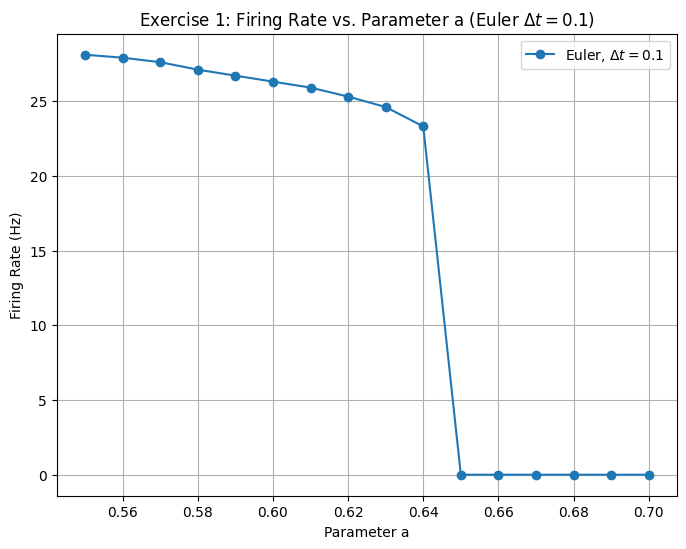

Exercise 1 Result: The threshold a_th to stop periodic firing is approximately 0.6500000000000001.


In [7]:
# --- 模擬參數 ---
a_values = np.arange(0.55, 0.71, 0.01)
warm_up_time = 300.0
simulation_time = 10000.0
dt1 = 0.1

# --- 執行計算 ---
firing_rates1 = calculate_firing_rate(a_values, dt1, simulation_time, warm_up_time, euler_step)

# --- 繪圖與結果 ---
plt.figure(figsize=(8, 6))
plt.plot(a_values, firing_rates1, '-o', label=r'Euler, $\Delta t = 0.1$')
plt.xlabel('Parameter a')
plt.ylabel('Firing Rate (Hz)')
plt.title('Exercise 1: Firing Rate vs. Parameter a (Euler $\Delta t=0.1$)')
plt.grid(True)
plt.legend()
plt.show()

# 確定閾值 a_th
a_th_1 = 0
for a, freq in zip(a_values, firing_rates1):
    if freq < 0.001:  # 放電頻率接近零
        a_th_1 = a
        break
if a_th_1 == 0: a_th_1 = ">= 0.71"

print(f"Exercise 1 Result: The threshold a_th to stop periodic firing is approximately {a_th_1}.")


## Exercise 2

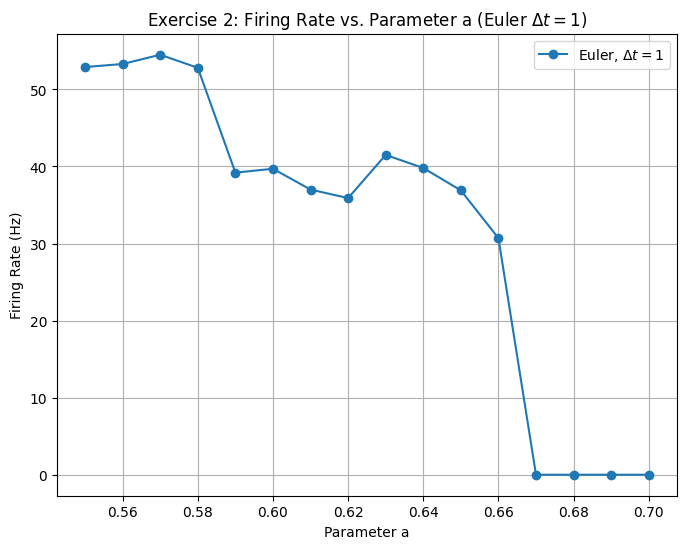

Exercise 2 Result: The threshold a_th to stop periodic firing is approximately 0.6700000000000002.


In [12]:
# --- 模擬參數 ---
a_values = np.arange(0.55, 0.71, 0.01)
warm_up_time = 300.0
simulation_time = 10000.0
dt2 = 1

# --- 執行計算 ---
firing_rates1 = calculate_firing_rate(a_values, dt2, simulation_time, warm_up_time, euler_step)

# --- 繪圖與結果 ---
plt.figure(figsize=(8, 6))
plt.plot(a_values, firing_rates1, '-o', label=r'Euler, $\Delta t = 1$')
plt.xlabel('Parameter a')
plt.ylabel('Firing Rate (Hz)')
plt.title('Exercise 2: Firing Rate vs. Parameter a (Euler $\Delta t=1$)')
plt.grid(True)
plt.legend()
plt.show()

# 確定閾值 a_th
a_th_1 = 0
for a, freq in zip(a_values, firing_rates1):
    if freq < 0.001:  # 放電頻率接近零
        a_th_1 = a
        break
if a_th_1 == 0: a_th_1 = ">= 0.71"

print(f"Exercise 2 Result: The threshold a_th to stop periodic firing is approximately {a_th_1}.")


#### Respond for Exercise 2 :
Exercise 2 的 Delta t 較大，使用較大步長學習導致結果在非閾值處出現了震盪，可能導致閾值的計算結果不準確

## Exercise 3

In [14]:
def runge_kutta(y,f,dt):
    k1 = f(y)
    k2 = f(y+k1*dt/2)
    k3 = f(y+k2*dt/2)
    k4 = f(y+k3*dt)
    y += dt*(k1+2*(k2+k3)+k4)/6
    return y

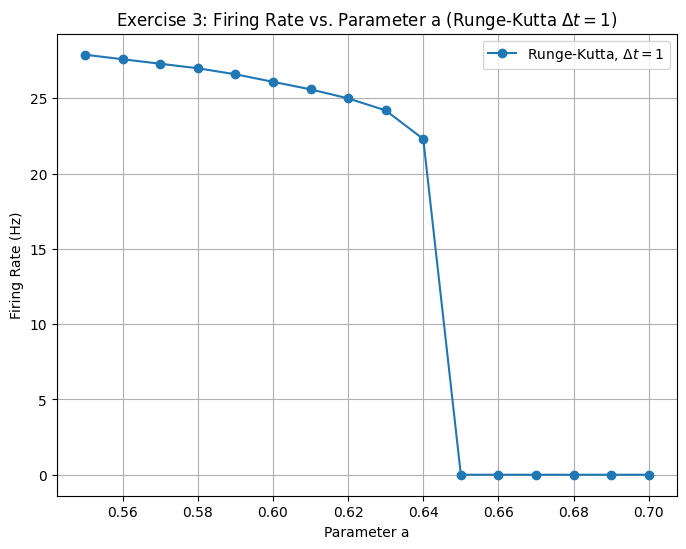

Exercise 3 Result: The threshold a_th to stop periodic firing is approximately 0.6500000000000001.


In [17]:
# --- 執行計算 ---
firing_rates1 = calculate_firing_rate(a_values, dt2, simulation_time, warm_up_time, runge_kutta)

# --- 繪圖與結果 ---
plt.figure(figsize=(8, 6))
plt.plot(a_values, firing_rates1, '-o', label=r'Runge-Kutta, $\Delta t = 1$')
plt.xlabel('Parameter a')
plt.ylabel('Firing Rate (Hz)')
plt.title('Exercise 3: Firing Rate vs. Parameter a (Runge-Kutta $\Delta t=1$)')
plt.grid(True)
plt.legend()
plt.show()

# 確定閾值 a_th
a_th_1 = 0
for a, freq in zip(a_values, firing_rates1):
    if freq < 0.001:  # 放電頻率接近零
        a_th_1 = a
        break
if a_th_1 == 0: a_th_1 = ">= 0.71"

print(f"Exercise 3 Result: The threshold a_th to stop periodic firing is approximately {a_th_1}.")


#### Respond for Exercise 3:
即使同樣使用大步長，由於使用runge_kutta方法時誤差階數更高，在起始delta t=0.1時起始精確度便較高，因此即使步數大，此方法仍與delta t = 0.1時的誤差差距不大。
不過此方法也對起始步長設定和delta t的更動更加敏感